El proposito de este ejercicio es crear un modelo de regresión lineal que establesca una la relación entre las emisiones de CO2 respecto a la configuración de la matriz energética de los paises. 

Además se realizará una comparación de los modelos usando datos sin normalización versus datos normalizados.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#cargamos los datos de matriz energetica y los de emisiones que están en distintos archivos y los unimos en un mismo data frame
df = pd.read_csv('per-capita-energy-source-stacked.csv',delimiter=',')
df2 =pd.read_csv('energy.csv')
df3 =pd.merge(df,df2,how='left',on=('Entity','Code','Year'))
df3

,Entity,Code,Year,Fossil fuels per capita (kWh),Nuclear per capita (kWh - equivalent),Renewables per capita (kWh - equivalent),Carbon intensity of electricity (gCO2/kWh)
0,Africa,NaN,1965,2106.226318,0.000000,128.437164,NaN
1,Africa,NaN,1966,2142.466309,0.000000,139.716644,NaN
2,Africa,NaN,1967,2106.051270,0.000000,142.219559,NaN
3,Africa,NaN,1968,2153.038086,0.000000,162.188400,NaN
4,Africa,NaN,1969,2134.460938,0.000000,184.498459,NaN
...,...,...,...,...,...,...,...
4863,World,OWID_WRL,2017,17593.189453,892.252136,2368.126953,447.112701
4864,World,OWID_WRL,2018,17811.734375,898.433167,2489.007812,443.927032
4865,World,OWID_WRL,2019,17648.564453,917.006226,2588.878662,435.212341
4866,World,OWID_WRL,2020,16523.912109,871.005188,2704.402100,421.854004


In [7]:
#renombramos el nombre de las columnas para que sean más fáciles de operar
df3 = df3.rename(columns = {'Fossil fuels per capita (kWh)':'Fossil','Nuclear per capita (kWh - equivalent)':'Nuclear','Renewables per capita (kWh - equivalent)':'Renewables','Carbon intensity of electricity (gCO2/kWh)':'Carbon Intensity'})
#eliminamos las filas vacias de Carbon Intensity
df3 = df3.dropna(axis=0, subset='Carbon Intensity')
#eliminamos también todas las entidades que no son paises, puesto que repiten la información de los paises (son los que no tienen Code + World).
df3 = df3.dropna(axis=0, subset='Code')
df3 = df3.drop(df3.query("Entity==['World']").index)
df3

,Entity,Code,Year,Fossil,Nuclear,Renewables,Carbon Intensity
92,Algeria,DZA,2000,9657.356445,0.0,5.143878,468.282684
93,Algeria,DZA,2001,9875.843750,0.0,6.445079,467.230042
94,Algeria,DZA,2002,10101.492188,0.0,5.222823,467.303223
95,Algeria,DZA,2003,10418.791992,0.0,23.820015,464.643738
96,Algeria,DZA,2004,10677.011719,0.0,22.124414,464.014862
...,...,...,...,...,...,...,...
4806,Vietnam,VNM,2017,7754.921387,0.0,2476.972168,386.287598
4807,Vietnam,VNM,2018,9007.640625,0.0,2360.162354,441.866150
4808,Vietnam,VNM,2019,10510.366211,0.0,1985.779907,507.908875
4809,Vietnam,VNM,2020,9744.342773,0.0,2306.041748,476.656982


<AxesSubplot:>

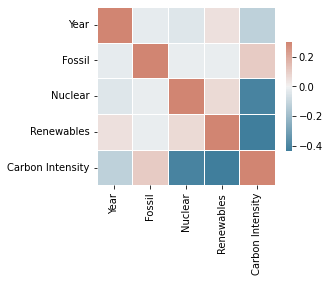

In [8]:
#Para comenzar con el analisis hacemos una matriz de correlaciones usando Seaborn para expresarlo con colores
corr = df3.corr()
corr
f, ax = plt.subplots(figsize=(4, 4))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
#Nos interesa ver los paises que producen energía nuclear y ver su relación con la intensidad de carbono. Tomamos solo los datos del último año (2021).
df2021 = df3.query('Year == 2021 & Nuclear > 0')


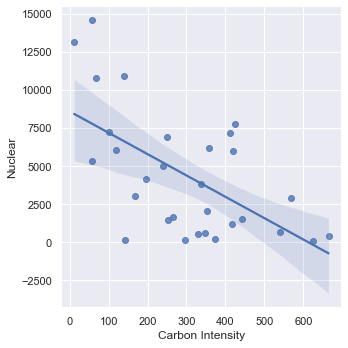

In [10]:
#hacemos un gráfico de dispersión para ver si existe relación
sns.set_theme(style="darkgrid")
sns.lmplot(data=df2021, x="Carbon Intensity", y="Nuclear")


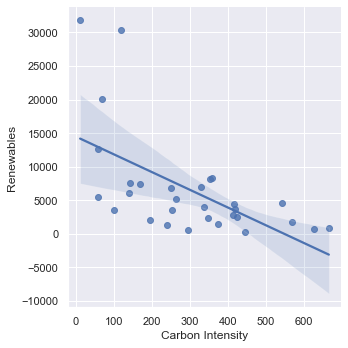

In [11]:
#Hacemos lo mismo ahora con las energías renovables
sns.lmplot(data=df2021, x="Carbon Intensity", y="Renewables")


In [16]:
df2021['RenewablesAC'] = df2021['Renewables'] + df2021['Nuclear']
df2021['FossilAC'] = df2021['Fossil'] + df2021['Renewables'] + df2021['Nuclear']
df2021 = df2021.sort_values('Nuclear',ascending=False)
df2021

,Entity,Code,Year,Fossil,Nuclear,Renewables,Carbon Intensity,RenewablesAC,FossilAC
1446,France,FRA,2021,19916.160156,14559.283203,5459.512207,58.479198,20018.795410,39934.955566
4052,Sweden,SWE,2021,17524.636719,13119.026367,31797.593750,11.770537,44916.620117,62441.256836
523,Belgium,BEL,2021,48103.613281,10917.757812,6077.937988,139.727402,16995.695801,65099.309082
1389,Finland,FIN,2021,27143.113281,10789.448242,20078.312500,68.833595,30867.760742,58010.874023
3881,South Korea,KOR,2021,57816.984375,7733.501953,2536.220215,423.826752,10269.722168,68086.706543
3678,Slovakia,SVK,2021,24963.291016,7255.033691,3546.329590,100.857819,10801.363281,35764.654297
1010,Czechia,CZE,2021,33043.515625,7195.128418,2823.517334,412.245483,10018.645752,43062.161377
3710,Slovenia,SVN,2021,21831.500000,6892.395996,6770.812012,250.879059,13663.208008,35494.708008
4602,United States,USA,2021,63129.500000,6177.967773,8266.248047,357.202087,14444.215820,77573.715820
694,Canada,CAN,2021,65231.308594,6065.679199,30393.783203,118.996681,36459.462402,101690.770996


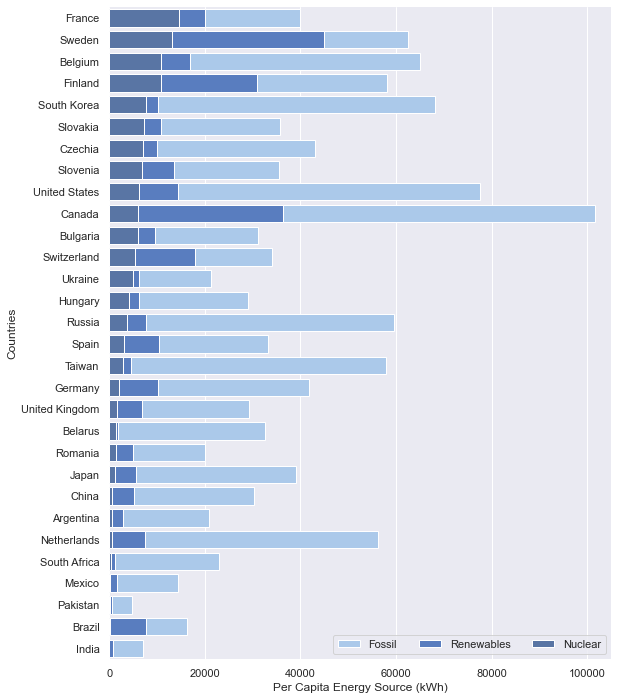

In [17]:

f, ax = plt.subplots(figsize=(9, 12))
sns.set_color_codes('pastel')
sns.barplot(x="FossilAC", y="Entity", data=df2021,label="Fossil", color="b")
sns.set_color_codes("muted")
sns.barplot(x="RenewablesAC", y="Entity", data=df2021,label="Renewables", color="b")
sns.set_color_codes("deep")
sns.barplot(x="Nuclear", y="Entity", data=df2021,label="Nuclear", color="b")
#sns.scatterplot(x="Carbon Intensity", y='Entity', data=df2021,label='Carbon Intensity',)
ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlim=(0, 105000), ylabel="Countries",xlabel="Per Capita Energy Source (kWh)")
sns.despine(left=True, bottom=True)

In [18]:
#Realizamos el primer modelo sin normalizar los datos.
from sklearn.linear_model import LinearRegression

df3 = df3.dropna()
X = df3.drop(['Entity','Code','Year','Carbon Intensity'], axis=1)
Y = df3['Carbon Intensity']
model = LinearRegression()
model.fit(X,Y)
r_sq = model.score(X,Y)
print(f"el R2 es  {r_sq}")
print(f"el intercepto es {model.intercept_}")
print(f"los coeficientes son {model.coef_}")



el R2 es  0.3463530953194319
el intercepto es 457.8258710696642
los coeficientes son [ 0.0004543  -0.01924601 -0.00486673]


R2 dió 0.35 lo cual es un bajo grado de ajuste del modelo. El problema radica en que 'Carbon Intensity' es una medida de CO2 por KWH producido, mientras que las variables Fossil, Nuclear y Renewables se expresan en KWH per capita. Podemos tener un pais que produce poca energía respecto a su población, pero toda es producida mediante combustibles fosiles, mientras que otro puede producir más energía per capita pero solo una fracción es producida por combustibles fosiles. En ese caso pueden tener un valor similar en producción de energía fosil, pero el valor de la intensidad de CO2 es distinta.

Ejemplo
        Pais A Pais B
Fossil  1000    1000
Nuclear   0       0
Renew     0     1000
C. I.    200     100 

Para eso transformaremos las variables 'Fossil' , ' Nuclear' y 'Renewables' en relativos, el valor de cada una es un % del total.

In [19]:
X['Fossil_rel'] = X['Fossil'] / (X['Fossil'] + X["Nuclear"] + X['Renewables'])
X['Nuclear_rel'] = X['Nuclear'] / (X['Fossil'] + X["Nuclear"] + X['Renewables'])
X['Renewables_rel'] = X['Renewables'] / (X['Fossil'] + X["Nuclear"] + X['Renewables'])

X1 = X.drop(['Fossil','Nuclear', 'Renewables'], axis=1)
model2 = LinearRegression()
model2.fit(X1,Y)
r_sq2 = model2.score(X1,Y)
print(f"el R2 es  {r_sq2}")
print(f"el intercepto es {model2.intercept_}")
print(f"los coeficientes son {model2.coef_}")

el R2 es  0.5916288570061972
el intercepto es -6.795914463862234e+16
los coeficientes son [6.79591446e+16 6.79591446e+16 6.79591446e+16]


Vemos ahora que R2 aumentó a 0.59 lo que es una mejor sustantiva respecto al modelo anterior